In [55]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from py_pol.stokes import Stokes

In [ ]:
def read_data(path):
    return pd.read_csv(path,skiprows=7,skipfooter=0,engine='python',delimiter=';')

def subtraction_uncertainty(unc_vec1:list,unc_vec2:list):

    unc_vec1 = np.array(unc_vec1)
    unc_vec2 = np.array(unc_vec2)

    return np.sqrt(unc_vec1**2+unc_vec2**2)

def magnitude_vec(vec1:list):

    vec1 = np.array(vec1)
    mag = 0
    for i in vec1:
        mag += i**2

    return np.sqrt(mag)

def magnitude_uncertainty(vec1:list,unc_vec1:list):

    vec1 = np.array(vec1)
    unc_vec1 = np.array(unc_vec1)

    mag = magnitude_vec(vec1)

    unc_radicand = 0

    for i in range(len(vec1)):

        unc_radicand += vec1[i]**2 * unc_vec1[i]**2

    unc_mag = 1/mag * np.sqrt(unc_radicand)

    return unc_mag

def file_rename(file_name:str):

    file_name = file_name.replace('Port','')
    file_name = file_name.replace('port','')
    file_name = file_name.replace('_','')
    file_name = file_name.replace('to','->')

    return file_name



-0.17453292519943295

In [62]:
path = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\PM_components\New_meas"

files = os.listdir(path)

PM_to_PAX = []
port1 = []
port2 = []
portT = []
portR = []
FORF_T = []
data_dict = {}

for file in files:
    if 'FORF' in file:
        FORF_T.append(read_data(path+'\\'+file))

    elif file.startswith('port1'):
        port1.append(read_data(path+'\\'+file))

    elif file.startswith('port2'):
        port2.append(read_data(path+'\\'+file))
        
    elif file.startswith('portT'):
        portT.append(read_data(path+'\\'+file))
        
    elif file.startswith('portR'):
        portR.append(read_data(path+'\\'+file))

    elif 'PM_to_PAX' in file:
        PM_to_PAX.append(read_data(path+'\\'+file))

    if '.txt' not in file:
        
        data = read_data(path+'\\'+file)

        P_avg = np.average(data[' Pol Power[dBm] '])
        P_std = np.std(data[' Pol Power[dBm] '])

        s1_avg = np.average(data[' Normalized s 1 '])
        s1_std = np.std(data[' Normalized s 1 '])

        s2_avg = np.average(data[' Normalized s 2 '])
        s2_std = np.std(data[' Normalized s 2 '])

        s3_avg = np.average(data[' Normalized s 3 '])
        s3_std = np.std(data[' Normalized s 3 '])

        azimuth_avg = np.average(data[' Azimuth[°] '])
        azimuth_std = np.std(data[' Azimuth[°] '])

        ellip_avg = np.average(data[' Ellipticity[°] '])
        ellip_std = np.std(data[' Ellipticity[°] '])
        

        data_dict.update({f'{file[:-4]}': np.array([P_avg,P_std,
                                                    s1_avg,s1_std,s2_avg,s2_std,s3_avg,s3_std,
                                                    azimuth_avg,azimuth_std,ellip_avg,ellip_std])})

In [64]:
ref_vector_avg = np.array([data_dict['PM_to_PAX'][i] for i in [2,4,6]])
ref_vector_std = np.array([data_dict['PM_to_PAX'][i] for i in [3,5,7]])

diff_dict = {}

mag_dict = {}

for file in files:
    if '.txt' not in file:
        if 'PM_to_PAX' in file:
            pass

        else:

            vector_avg = np.array([data_dict[f'{file[:-4]}'][j] for j in [2,4,6]])

            vector_std = np.array([data_dict[f'{file[:-4]}'][j] for j in [3,5,7]])

            diff_vec = vector_avg-ref_vector_avg

            diff_unc = subtraction_uncertainty(vector_std,ref_vector_std)

            diff_dict.update({f'{file[:-4]}': [diff_vec,diff_unc]})

            mag = magnitude_vec(diff_vec)

            unc = magnitude_uncertainty(diff_vec,diff_unc)

            mag_dict.update({f'{file[:-4]}': [mag,unc]})


        



In [65]:
diff_dict

{'port1_to_port2': [array([-0.09552943,  0.05524357,  0.26389712]),
  array([0.0320725 , 0.03480192, 0.12509067])],
 'port1_to_portR': [array([ 0.02129512, -0.04469244,  0.08183891]),
  array([0.00805636, 0.01260466, 0.0253103 ])],
 'port1_to_portT': [array([-0.04422371,  0.04088481,  0.00377295]),
  array([0.0084417 , 0.00758264, 0.01322511])],
 'port2_to_port1': [array([ 0.16353901,  0.02612615, -0.22716486]),
  array([0.13814765, 0.11249592, 0.11998203])],
 'port2_to_portR': [array([-0.06113369,  0.02993068,  0.09215717]),
  array([0.00687357, 0.00699565, 0.01283826])],
 'port2_to_portR_to_FORF_to_port1_max_refl': [array([ 0.28662771, -0.17050083,  0.57108514]),
  array([0.00945368, 0.00693507, 0.01245993])],
 'port2_to_portR_to_FORF_to_port1_max_refl_moved_rot': [array([ 0.14583901, -0.13304051,  0.45251848]),
  array([0.01076431, 0.00749993, 0.01419608])],
 'port2_to_portR_to_FORF_to_port1_max_refl_moved_rot_again': [array([ 0.30340568, -0.17419051,  0.58243514]),
  array([0.00473

Text(0, 0.5, "Magnitude of Stokes' vector difference")

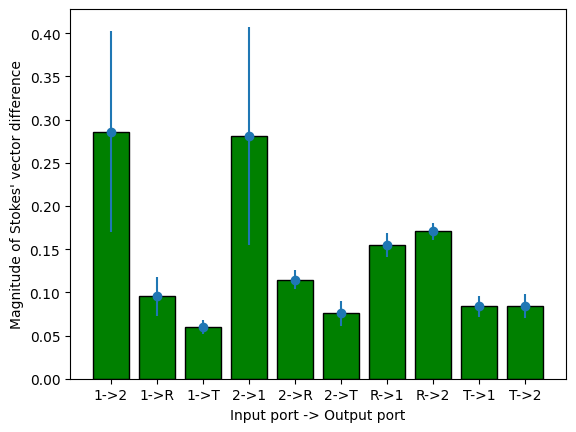

In [51]:
names = np.array([file_rename(file_name) for file_name in list(mag_dict.keys())])

mag_values = np.array(list(mag_dict.values()))[:,0]

mag_std_values = np.array(list(mag_dict.values()))[:,1]

no_FORF = list(range(15))

for i in range(5,9):
    no_FORF.remove(i)

no_same_side = no_FORF.copy()

for i,unc in enumerate(mag_std_values):

    if i in range(6,10):
        pass
    elif unc > 0.2:
        no_same_side.remove(i)


plt.bar(names[no_same_side],mag_values[no_same_side], color='g', ec="k")

plt.errorbar(names[no_same_side],mag_values[no_same_side],yerr=mag_std_values[no_same_side],fmt="o")

plt.xlabel('Input port -> Output port')
plt.ylabel("Magnitude of Stokes' vector difference")

Degree of polarization stays the same for portT-->port2 as the reference, so not depolarization.

In [54]:
data_dict['portT_to_port2'][2::2] - ref_vector_avg

array([ 0.03923901, -0.05242385,  0.05260181])

In [82]:
ref_vector_avg

array([-0.64340568, -0.71569282, -0.27108514])

In [ ]:
PM_to_PAX[0][]

0     -8.15
1     -8.16
2     -8.16
3     -8.16
4     -8.16
       ... 
594   -7.21
595   -7.20
596   -7.19
597   -7.19
598   -7.19
Name:  Ellipticity[°] , Length: 599, dtype: float64

In [106]:
data_dict['PM_to_PAX'][2:7:2]


array([-0.64340568, -0.71569282, -0.27108514])

In [157]:
data_dict

{'PM_to_PAX': array([-2.75405509e+00,  1.77373333e-02, -6.43405676e-01,  4.73900110e-03,
        -7.15692821e-01,  4.95176721e-03, -2.71085142e-01,  1.24599296e-02,
        -6.59979132e+01,  1.29335605e-01, -7.88343907e+00,  3.59503728e-01]),
 'port1_to_port2': array([-5.83591664e+01,  1.61097338e+00, -7.38935108e-01,  3.17204530e-02,
        -6.60449251e-01,  3.44478361e-02, -7.18801997e-03,  1.24468573e-01,
        -6.91035108e+01,  1.33533876e+00, -2.06123128e-01,  3.58544406e+00]),
 'port1_to_portR': array([-6.02889280e+00,  9.86314554e-03, -6.22110553e-01,  6.51511624e-03,
        -7.60385260e-01,  1.15912656e-02, -1.89246231e-01,  2.20309210e-02,
        -6.46418760e+01,  3.28470642e-01, -5.46505863e+00,  6.30304655e-01]),
 'port1_to_portT': array([-6.16946578e+00,  1.01781337e-02, -6.87629382e-01,  6.98600113e-03,
        -6.74808013e-01,  5.74251658e-03, -2.67312187e-01,  4.43325968e-03,
        -6.77822705e+01,  2.32309707e-01, -7.75191987e+00,  9.31107025e-02]),
 'port2_to_po

PM 50:50 Splitter = 
[+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   [+1.000]   
[-0.644]   [-0.688]   [-0.622]   [-0.671]   [-0.706]   [-0.666]   [-0.603]   [-0.676]   [-0.752]   
[-0.715]   [-0.675]   [-0.760]   [-0.713]   [-0.685]   [-0.721]   [-0.767]   [-0.727]   [-0.638]   
[-0.272]   [-0.267]   [-0.190]   [-0.201]   [-0.179]   [-0.192]   [-0.219]   [-0.120]   [-0.165]   



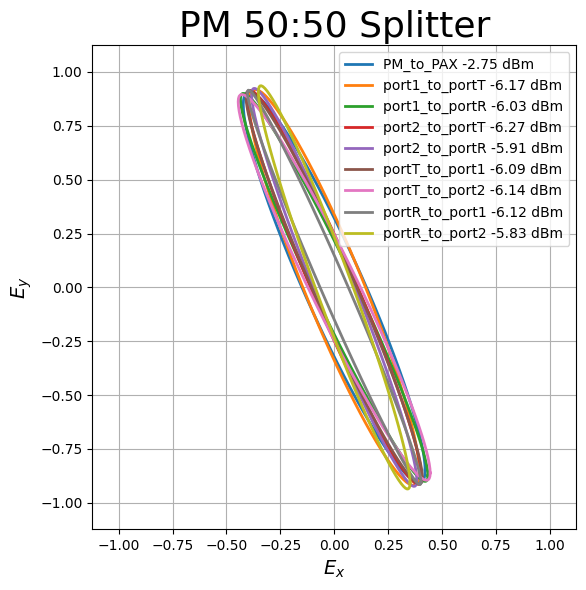

In [176]:
S = Stokes('PM 50:50 Splitter')

# name_list = ['PM_to_PAX','port1_to_port2','port1_to_portT','port1_to_portR','port2_to_port1','port2_to_portT','port2_to_portR','portT_to_portR','portT_to_port1','portT_to_port2','portR_to_port1','portR_to_port2']
name_list = ['PM_to_PAX','port1_to_portT','port1_to_portR','port2_to_portT','port2_to_portR','portT_to_port1','portT_to_port2','portR_to_port1','portR_to_port2']
angles = []
ellipticities = []

legend_list =[]

for name in name_list:

    angle = np.deg2rad(data_dict[name][8])

    if angle < 0:
        angle += 2*np.pi

    angles.append(angle)

    ellip = np.deg2rad(data_dict[name][10])

    ellipticities.append(ellip)

    legend_list.append(f'{name} {data_dict[name][0]:.2f} dBm')


print(S.general_azimuth_ellipticity(amplitude=1, azimuth=angles, ellipticity=ellipticities))


fig = S.draw_poincare(subplots=True)

fig.show()

fig2 = S.draw_ellipse(draw_arrow=False)
plt.legend(legend_list)

plt.savefig(r'O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\PM_components\New_meas\PM_splitter_ellipse.pdf')



Fiber optic retroreflector = 
[+1.000]   [+1.000]   [+1.000]   [+1.000]   
[-0.356]   [-0.497]   [-0.340]   [-0.244]   
[-0.885]   [-0.848]   [-0.887]   [-0.942]   
[+0.300]   [+0.182]   [+0.314]   [+0.232]   



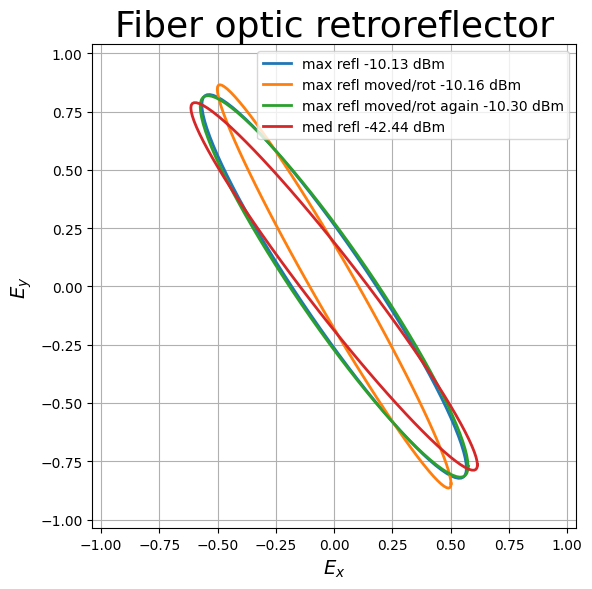

In [178]:
S = Stokes('Fiber optic retroreflector')

name_list = ['port2_to_portR_to_FORF_to_port1_max_refl',
'port2_to_portR_to_FORF_to_port1_max_refl_moved_rot',
'port2_to_portR_to_FORF_to_port1_max_refl_moved_rot_again',
'port2_to_portR_to_FORF_to_port1_med_refl']

legend_list = [f'max refl {data_dict['port2_to_portR_to_FORF_to_port1_max_refl'][0]:.2f} dBm',
f'max refl moved/rot {data_dict['port2_to_portR_to_FORF_to_port1_max_refl_moved_rot'][0]:.2f} dBm' ,
f'max refl moved/rot again {data_dict['port2_to_portR_to_FORF_to_port1_max_refl_moved_rot_again'][0]:.2f} dBm',
f'med refl {data_dict['port2_to_portR_to_FORF_to_port1_med_refl'][0]:.2f} dBm']

angles = []
ellipticities = []

for name in name_list:

    angle = np.deg2rad(data_dict[name][8])

    if angle < 0:
        angle += 2*np.pi

    angles.append(angle)

    ellip = np.deg2rad(data_dict[name][10])

    ellipticities.append(ellip)


print(S.general_azimuth_ellipticity(amplitude=1, azimuth=angles, ellipticity=ellipticities))


fig = S.draw_poincare(subplots=True)

fig.show()

fig2 = S.draw_ellipse(draw_arrow=False)
plt.legend(legend_list)

plt.savefig(r'O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\PM_components\New_meas\PM_FORF_ellipse.pdf')
